In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle_zillow as w

import warnings
warnings.filterwarnings('ignore')

## Questions 

1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
2. Is logerror significantly differenct for numbers of bedrooms?
3. Is logerror significantly differenct for numbers of bathrooms?
4. Is logerror significantly differenct for calculated sqft?

In [2]:
df = w.wrangle_zillow(.6, .75)

df.head()

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,NaN,Single Family Residential
1,261.0,NaN,17052889,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,NaN,Single Family Residential
2,261.0,NaN,14186244,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,NaN,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
4,266.0,2.0,10887214,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,119407.0,2016.0,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium


In [3]:
df['fips'].value_counts()

6037.0    45531
6059.0    20270
6111.0     5811
Name: fips, dtype: int64

In [4]:
def remove_all_outliers(df):
    
    outliers_index = set()
    
    num_cols = ['bedroomcnt', 'bathroomcnt', 'lotsizesquarefeet', 'taxvaluedollarcnt']
    
    for col in num_cols:
        quartile_1, quartile_3 = df[col].quantile([.25,.75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers_index.update(outliers)
    
    return df.drop(outliers_index)


In [5]:
df = remove_all_outliers(df)

In [6]:
df.shape

(56852, 35)

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

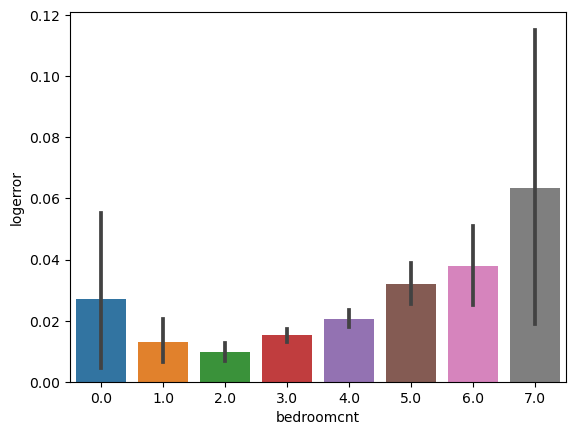

In [7]:
sns.barplot(data = df, x ='bedroomcnt', y = 'logerror')

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

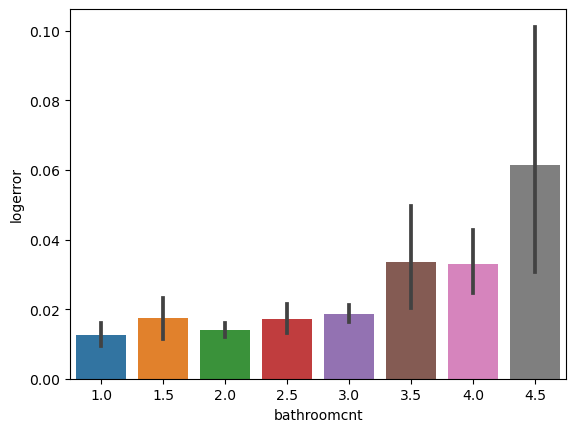

In [8]:
sns.barplot(data = df, x ='bathroomcnt', y = 'logerror')

In [9]:
county_map = {6037: 'los angeles', 6111: 'ventura', 6059: 'orange'}
df['county'] = df['fips'].replace(county_map)

In [10]:
df['county'].value_counts()

los angeles    33020
orange         18554
ventura         5278
Name: county, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56852 entries, 0 to 77578
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         56852 non-null  float64
 1   heatingorsystemtypeid         34215 non-null  float64
 2   parcelid                      56852 non-null  int64  
 3   id                            56852 non-null  int64  
 4   bathroomcnt                   56852 non-null  float64
 5   bedroomcnt                    56852 non-null  float64
 6   buildingqualitytypeid         32892 non-null  float64
 7   calculatedbathnbr             56842 non-null  float64
 8   calculatedfinishedsquarefeet  56845 non-null  float64
 9   finishedsquarefeet12          56701 non-null  float64
 10  fips                          56852 non-null  float64
 11  fullbathcnt                   56842 non-null  float64
 12  latitude                      56852 non-null  float64
 13  l

<AxesSubplot:xlabel='county', ylabel='logerror'>

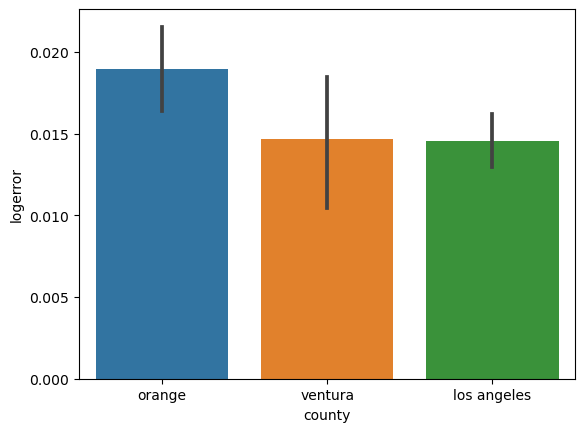

In [12]:
sns.barplot(data = df, x = 'county', y ='logerror')

In [13]:
df.corr()

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror
propertylandusetypeid,1.000000,0.218372,0.143445,-0.002171,0.011833,-0.413641,0.319445,0.011819,-0.254987,-0.257535,...,0.020781,0.429114,0.049979,0.011968,NaN,-0.012023,-0.006466,0.019233,-0.001355,-0.015428
heatingorsystemtypeid,0.218372,1.000000,0.130614,0.001051,-0.357214,-0.286102,-0.649267,-0.357214,-0.340202,-0.340216,...,-0.003274,-0.231716,-0.296872,-0.151171,NaN,-0.042545,-0.185268,0.009230,-0.020100,-0.006067
parcelid,0.143445,0.130614,1.000000,0.002788,0.056686,0.013396,-0.065107,0.056690,0.033330,0.034120,...,0.004994,0.200570,0.071125,0.054208,NaN,0.036692,0.018892,0.089903,-0.002792,0.003360
id,-0.002171,0.001051,0.002788,1.000000,-0.004317,-0.000650,-0.002176,-0.004309,-0.004634,-0.004480,...,-0.001909,-0.002366,-0.005405,-0.005674,NaN,-0.004575,-0.006058,-0.004601,-0.001173,0.001183
bathroomcnt,0.011833,-0.357214,0.056686,-0.004317,1.000000,0.554263,0.650490,1.000000,0.752913,0.752587,...,0.013327,0.507706,0.618394,0.414162,NaN,0.204516,0.423346,0.012593,0.015721,0.023835
bedroomcnt,-0.413641,-0.286102,0.013396,-0.000650,0.554263,1.000000,0.272606,0.554305,0.665600,0.665189,...,0.004047,0.129105,0.343803,0.218356,NaN,0.097893,0.236087,0.011505,0.012005,0.031041
buildingqualitytypeid,0.319445,-0.649267,-0.065107,-0.002176,0.650490,0.272606,1.000000,0.650490,0.529160,0.529160,...,0.006237,0.573699,0.516670,0.308490,NaN,0.132897,0.320147,-0.000576,0.027159,-0.012191
calculatedbathnbr,0.011819,-0.357214,0.056690,-0.004309,1.000000,0.554305,0.650490,1.000000,0.752944,0.752587,...,0.013327,0.507729,0.618387,0.414196,NaN,0.204559,0.423379,0.012594,0.015746,0.023766
calculatedfinishedsquarefeet,-0.254987,-0.340202,0.033330,-0.004634,0.752913,0.665600,0.529160,0.752944,1.000000,1.000000,...,0.008769,0.320918,0.677445,0.464819,NaN,0.239034,0.476944,0.009457,0.015679,0.032923
finishedsquarefeet12,-0.257535,-0.340216,0.034120,-0.004480,0.752587,0.665189,0.529160,0.752587,1.000000,1.000000,...,0.008769,0.320145,0.678317,0.466031,NaN,0.240288,0.478099,0.009609,0.015444,0.033038


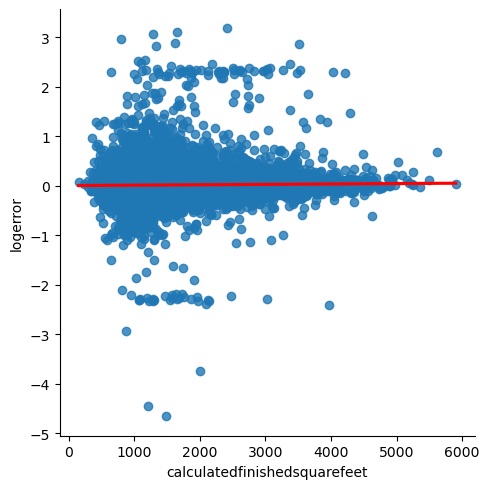

In [22]:
sns.lmplot(data = df, x = 'calculatedfinishedsquarefeet', y = 'logerror', line_kws = {'color': 'red'})